In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

In [3]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f 
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=42)    # the random seed

In [4]:
res.fun

-0.9150744784653289

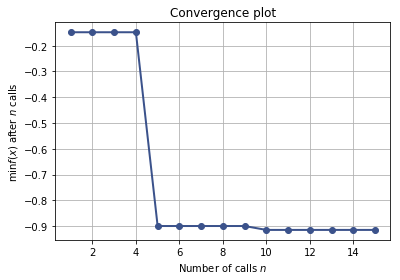

In [5]:
from skopt.plots import plot_convergence


plot_convergence(res);

In [62]:
from skopt.acquisition import gaussian_ei
plt.rcParams["figure.figsize"] = (15, 25)


def plot_example(grid=False):
    x = np.linspace(-2, 2, 400).reshape(-1, 1)
    x_gp = res.space.transform(x.tolist())
    fx = np.array([f(x_i, noise_level=0.0) for x_i in x])

    # Plot the 5 iterations following the 5 random points
    for n_iter in range(5):
        #plt.xticks([])
        #plt.yticks([])
        gp = res.models[n_iter]
        curr_x_iters = res.x_iters[:5+n_iter]
        curr_func_vals = res.func_vals[:5+n_iter]

        # Plot true function.
        plt.subplot(5, 2, 2*n_iter+1)
        plt.plot(x, fx, "r--", label="Unknown Objective")
        plt.fill(np.concatenate([x, x[::-1]]),
                 np.concatenate([fx - 1.9600 * noise_level, 
                                 fx[::-1] + 1.9600 * noise_level]),
                 alpha=.2, fc="r", ec="None")

        # Plot GP(x) + contours
        y_pred, sigma = gp.predict(x_gp, return_std=True)
        plt.plot(x, y_pred, "b--", label=r"$\mu_{GP}(x)$")
        plt.fill(np.concatenate([x, x[::-1]]),
                 np.concatenate([y_pred - 1.9600 * sigma, 
                                (y_pred + 1.9600 * sigma)[::-1]]),
                 alpha=.2, fc="b", ec="None")

        # Plot sampled points
        plt.plot(curr_x_iters, curr_func_vals,
                 "b.", markersize=8, label="Observations")

        # Adjust plot layout
        if grid:
            plt.grid()

        if n_iter == 0:
            plt.legend(loc="upper left", prop={'size': 15}, numpoints=1)
            plt.tick_params(axis='both', which='both', bottom='off', top='off', labelsize=16, labelleft='off', labelbottom='off')
            

        if n_iter != 0:
            plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', labelsize=16, labelleft='off')
            plt.tick_params(axis='both', which='both', length=0, labelleft='off', labelsize=16)

        # Plot EI(x)
        plt.subplot(5, 2, 2*n_iter+2)
        acq = gaussian_ei(x_gp, gp, y_opt=np.min(curr_func_vals))
        plt.plot(x, acq, "m", label="$EI$(x)")
        plt.fill_between(x.ravel(), -2.0, acq.ravel(), alpha=0.2, color='m')

        next_x = res.x_iters[5+n_iter]
        next_acq = gaussian_ei(res.space.transform([next_x]), gp, y_opt=np.min(curr_func_vals))
        plt.plot(next_x, next_acq, "mo", markersize=6, label="Next query point")

        # Adjust plot layout
        plt.ylim(0, 0.1)
        if grid:
            plt.grid()

        if n_iter == 0:
            plt.legend(loc="upper left", prop={'size': 15}, numpoints=1)
            plt.tick_params(axis='both', which='both', length=0, labelsize=16, labelleft='off', labelbottom='off')

        if n_iter != 0:
            #plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
            plt.tick_params(axis='both', which='both', labelleft='off', length=0, labelsize=16, labelbottom='off')
            
    fig1 = plt.gcf()
    fig1.savefig('bayes.png', dpi=1000)
    plt.show()

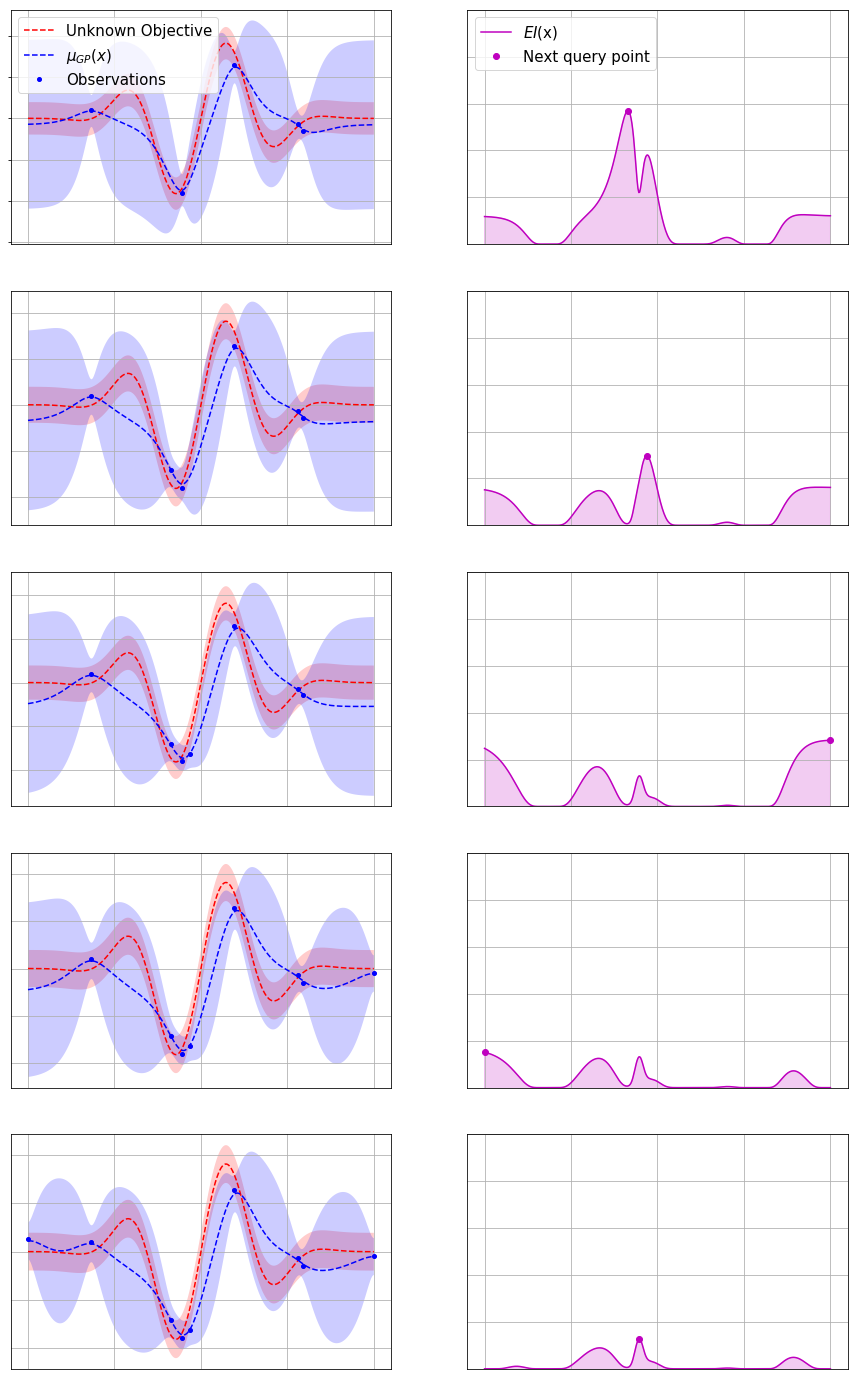

In [63]:
plot_example(grid=True)

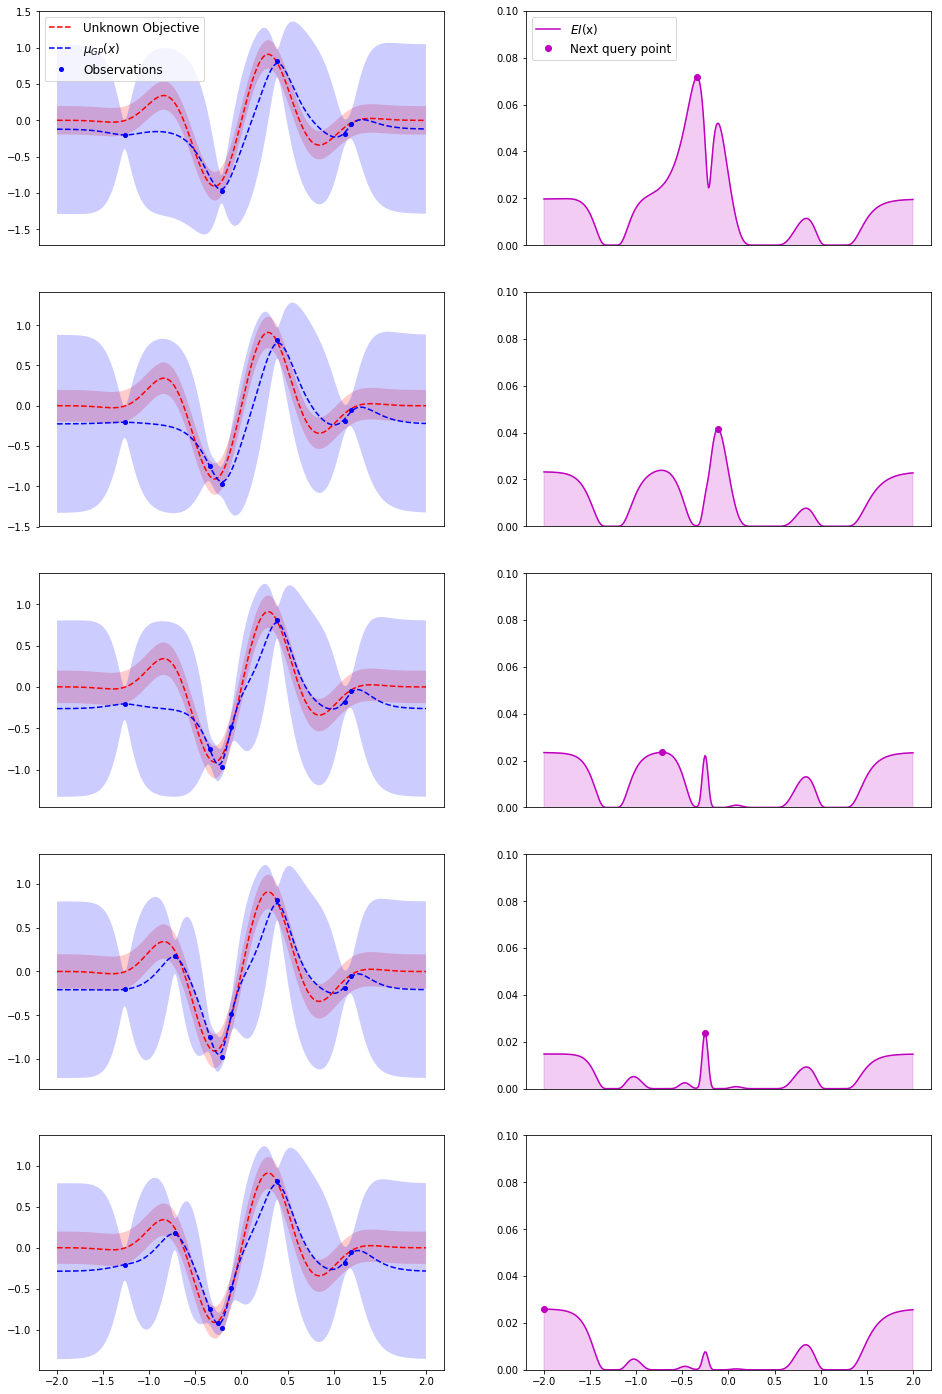

In [70]:
plot_example(grid=False)

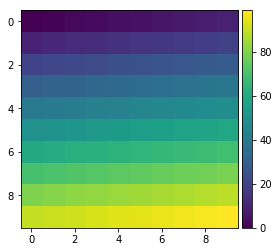

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

ax = plt.subplot(111)
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
plt.show()

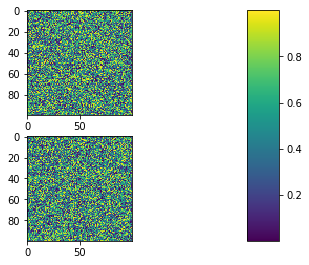

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.subplot(211)
plt.imshow(np.random.random((100, 100)))
plt.subplot(212)
plt.imshow(np.random.random((100, 100)))

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()
